In [1]:
import pandas as pd
import numpy as np
import random
from implementations import *
from helpers import load_csv_data

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seed = 7
DUMMY_VALUE: int = -999


## Data cleaning

We will start by importing the data using Pandas and aim to correct and/or or remove datapoints containing un-clean data

In [3]:
df = pd.read_csv('data/train.csv')
df.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [4]:
df.describe()

,Id,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [5]:
print(f'Entire dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

Entire dataset contains 250000 rows and 32 columns


Looking at the previous `df.head()` and `df.describe()`, we distinguish a great amount of dummy values set to `-999`, let's clear them

In [6]:
for col in df.columns:
    n = df[df[col] == DUMMY_VALUE].shape[0]
    if n != 0:
        print(f'{n:6d} dummy values in column "{col}"')

 38114 dummy values in column "DER_mass_MMC"
177457 dummy values in column "DER_deltaeta_jet_jet"
177457 dummy values in column "DER_mass_jet_jet"
177457 dummy values in column "DER_prodeta_jet_jet"
177457 dummy values in column "DER_lep_eta_centrality"
 99913 dummy values in column "PRI_jet_leading_pt"
 99913 dummy values in column "PRI_jet_leading_eta"
 99913 dummy values in column "PRI_jet_leading_phi"
177457 dummy values in column "PRI_jet_subleading_pt"
177457 dummy values in column "PRI_jet_subleading_eta"
177457 dummy values in column "PRI_jet_subleading_phi"


In [ ]:

for col in df.columns:
    df = df[df[col] != DUMMY_VALUE]

In [ ]:
print(f'After the removal of dummy values, the dataset contains {df.shape[0]} rows')

After the removal of dummy values, the dataset contains 68114 rows


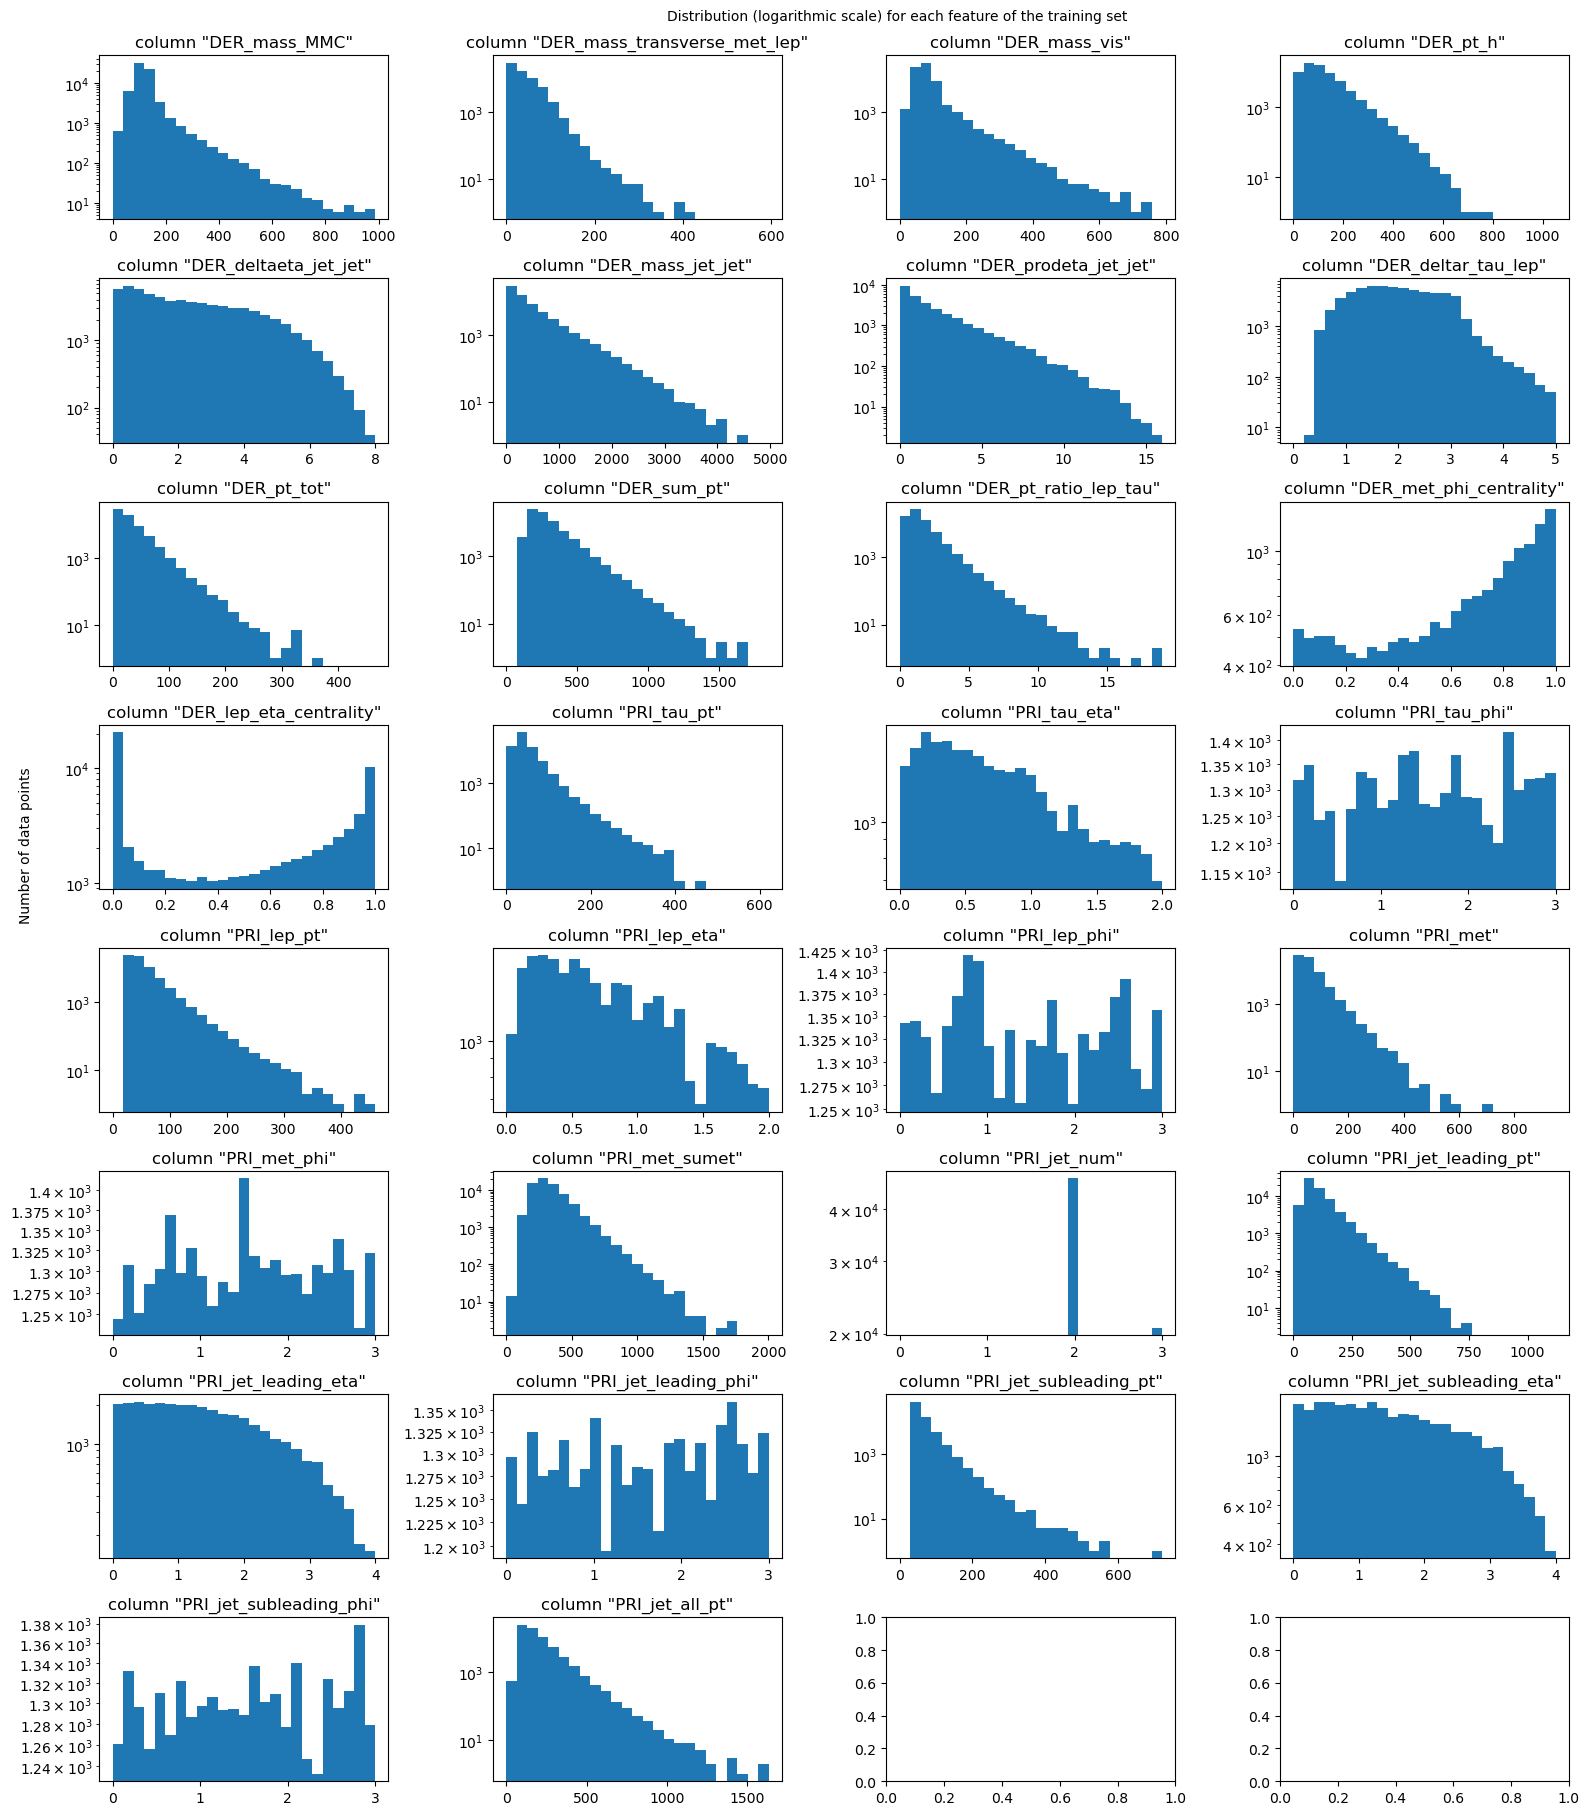

In [ ]:
excluded = ['Prediction', 'Id']

N_COLS = 4
N_ROWS = int(np.ceil((df.shape[1] - len(excluded)) / N_COLS))
             
fig, axs = plt.subplots(nrows = N_ROWS, ncols = N_COLS, figsize = (16, 18))


idx = 0

for col in df.columns:
    if col not in excluded:
        subplt = axs[int(idx / N_COLS), idx % N_COLS]
        subplt.hist(df[col], range = [0, int(df[col].max())], bins = 25, log=True)
        subplt.set_title(f'column "{col}"')
        idx += 1

fig.text(0.42, 1, 'Distribution (logarithmic scale) for each feature of the training set')
fig.text(0.015, 0.5, 'Number of data points', rotation = 90)

fig.tight_layout()


Looking at the previous set of graphs, we can see some columns containing clear outliers

In [ ]:
# Removing outliers
old_size = df.shape[0]

df = df[
      (df['DER_mass_transverse_met_lep'] < 500)
    & (df['DER_pt_h'] < 900)
    & (df['DER_pt_tot'] < 400)
    & (df['PRI_tau_pt'] < 500)
    & (df['PRI_met'] < 800)
    & (df['PRI_jet_leading_pt'] < 900)
]

print(f'Removed a total of {old_size - df.shape[0]} outliers')

Removed a total of 4 outliers


Finally we look at whether or not the data is well balanced. We do not want a training dataset containing predictions only for a subset of the possible output (e.g. training dataset only predicting the input $x$ to be of class `0` $\forall x$)

<AxesSubplot: >

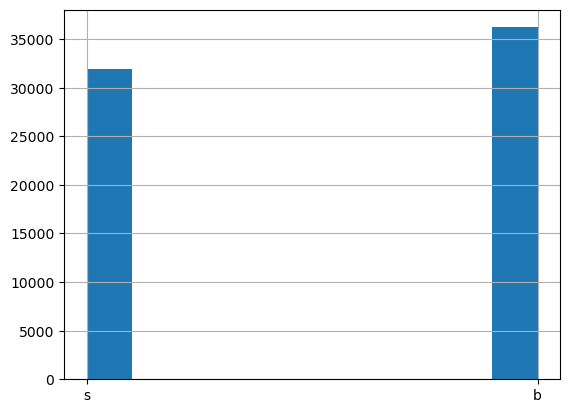

In [ ]:
df.Prediction.hist()

In [ ]:
df.to_csv('data/train_sanitized_jet_23.csv')

In [ ]:
df.PRI_jet_num.value_counts()

2    47425
3    20685
Name: PRI_jet_num, dtype: int64

In [ ]:
# TODO note: comme on peut voir, retirer les -999 équivaut basiquement à retirer les datapoints quand 
# jet_num = 0 ou jet_num = 1, ce qui eest pas ouf

In [ ]:
df = pd.read_csv('data/train.csv')

In [ ]:
df = df[df.PRI_jet_num <= 1]
df = df[[col for col in df.columns if (DUMMY_VALUE not in df[col].unique())]] # keep columns that dont have -999's

In [ ]:
df.to_csv('data/train_sanitized_jet_01.csv')

In [ ]:
train_labels, train_data, train_ids = load_csv_data("data/train.csv")
_, test_data, test_ids = load_csv_data("data/train.csv")


In [ ]:
train_data_mean = train_data.mean(axis=0)
train_data_std = train_data.std(axis=0)
x = (train_data - train_data_mean)/train_data_std
test_x = (test_data - train_data_mean)/train_data_std
y = train_labels

ValueError: operands could not be broadcast together with shapes (568238,30) (20,) 

functions to test different methods for regression

In [ ]:
def compute_loss(y, tx, model):
    err = y - (tx @ model)
    return (err.T @ err)/y.shape[0]

def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold.
    
    Args:
        y:      shape=(N,)
        k_fold: K in K-fold, i.e. the fold num
        seed:   the random seed

    Returns:
        A 2D array of shape=(k_fold, N/k_fold) that indicates the data indices for each fold

    >>> build_k_indices(np.array([1., 2., 3., 4.]), 2, 1)
    array([[3, 2],
           [0, 1]])
    """
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree.
    
    Args:
        x: numpy array of shape (N,D)
        degree: integer.
        
    Returns:
        poly: numpy array of shape (N,D*d+1)
    """    
    N = x.shape[0]
    D = x.shape[1]
    #poly_base = np.zeros((N, D*degree + 1))
    poly_base = np.ones((N,1))
    poly_base = np.hstack((poly_base, x.copy()))
    for i in range(degree-1):
        range_start = 1 + i*D
        range_stop = 1 + (i+1)*D
        next_power = poly_base[:,range_start:range_stop]*x
        poly_base = np.hstack((poly_base, next_power))
    
    return poly_base

def cross_validation(train_model, degree):
    """
    Tests a certain training function using 4-fold cross-validation
    arguments: 
    train_model: func(y, tx) -> model
    returns: model, training_loss, test_loss
    """
    tx = build_poly(x, degree)
    k = 4
    k_indices = build_k_indices(train_y, k, seed)
    test_idx = k_indices[k-1]
    train_idx = (k_indices[:k-1]).flatten()
    model, train_loss = train_model(y[train_idx], tx[train_idx])
    test_loss = compute_loss(y[test_idx], tx[test_idx], model)
    return model, train_loss, test_loss

Graph stuff

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cross_validation_visualization(lambds, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("r mse")
    #plt.xlim(1e-4, 1)
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")
    
def cross_validation_explore_lambda(train_model, degree, lambdas):
    """cross validation over regularisation parameter lambda.
    
    Args:
        train_model: func(y, tx, lambda) -> model
        degree: integer, degree of the polynomial expansion
        lambdas: shape = (p, ) where p is the number of values of lambda to test
    Returns:
        best_lambda : scalar, value of the best lambda
        best_mse : scalar, the associated mean squared error for the best lambda
    """
    seed = 12
    degree = degree
    lambdas = lambdas
    # define lists to store the loss of training data and test data
    mse_tr = []
    mse_te = []
    
    best_idx = 0
    idx = 0
    for lambda_ in np.nditer(lambdas):
        _, te, tr = cross_validation(lambda y,tx: train_model(y,tx, lambda_), degree)
        mse_tr.append(tr)
        mse_te.append(te)
        if te < mse_te[best_idx]:
            best_idx = idx
        idx += 1
    
    best_lambda = lambdas[best_idx]
    best_mse = mse_te[best_idx]
        
    cross_validation_visualization(lambdas, mse_tr, mse_te)
    print("For polynomial expansion up to degree %.f, the choice of lambda which leads to the best test mse is %.5f with a test mse of %.3f" % (degree, best_lambda, best_mse))
    return best_lambda, best_mse

lambdas = np.logspace(-4, 0, 30)
#best_lambda, best_rmse = cross_validation_demo(7, 4, np.logspace(-4, 0, 30))

Now try different methods

In [ ]:
cross_validation(least_squares,2)

In [ ]:
cross_validation_explore_lambda(lambda y,tx,lambda_: ridge_regression(y,tx,lambda_), 3, lambdas)

In [ ]:
cross_validation(lambda y,tx: logistic_regression(y, tx, np.zeros(tx.shape[1]), 100, 0.001), 1)